#    <font face="STCAIYUN" color=black size=7> <header><div style="text-align:center;"> Final Project of Data Science</div></font></header>

# <font color=blue size=6> Ⅰ. Background </font> 


# <font color=blue size=6>  Ⅱ. Research Procedure </font> 

# <font color=blue size=6>  Ⅲ. Import Libraries </font>

In [88]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.pipeline import make_pipeline

#  <font color=blue size=6>  Ⅳ. Wordcloud Analysis </font>

 <font color=black size=4>***Step 1: load book file&clean data***</font>

In [106]:
#excluded all the unnecessary and meaning 
excludes = ['the','and','to','of','i','a','in','it','that','is',
            'you','my','with','not','his','this','but','for',
            'me','s','he','be','as','so','him','your','was','had','have','I','we','from','here','there','said','t','on',
           'word','d','one','up','an','her','she','when','they','what','about','were','out','our','if','by','no','didn','am','"i','at',
            'just','all','or','and','would','then','them','who','into','than','all','down','over','way','day']
includes = ['major','snowball','nappoleon','squealer','boxer','clover','benjamin','moses','mollie','eminem','Old Major',
             'Mr.Jones','MR.pilkington','Mr.Frederick','Mr.Whymper','jones','pilkington','frederick','whymper']
def getText():    
    txt=open('data/Animal Farm.txt','r').read()    
    txt=txt.lower()    
    for ch in "~@#$%^&*()_-+=<>?/,.:;{}[]|\'""":    
        txt=txt.replace(ch,' ')       
    return txt    

KiteRunner=getText()    
words=KiteRunner.split() 
words

['title',
 'animal',
 'farm',
 'author',
 'george',
 'orwell',
 'pseudonym',
 'of',
 'eric',
 'blair',
 '1903',
 '1950',
 'a',
 'project',
 'gutenberg',
 'of',
 'australia',
 'ebook',
 'ebook',
 'no',
 '0100011',
 'txt',
 'language',
 'english',
 'date',
 'first',
 'posted',
 'august',
 '2001',
 'date',
 'most',
 'recently',
 'updated',
 'march',
 '2008',
 'project',
 'gutenberg',
 'of',
 'australia',
 'ebooks',
 'are',
 'created',
 'from',
 'printed',
 'editions',
 'which',
 'are',
 'in',
 'the',
 'public',
 'domain',
 'in',
 'australia',
 'unless',
 'a',
 'copyright',
 'notice',
 'is',
 'included',
 'we',
 'do',
 'not',
 'keep',
 'any',
 'ebooks',
 'in',
 'compliance',
 'with',
 'a',
 'particular',
 'paper',
 'edition',
 'copyright',
 'laws',
 'are',
 'changing',
 'all',
 'over',
 'the',
 'world',
 'be',
 'sure',
 'to',
 'check',
 'the',
 'copyright',
 'laws',
 'for',
 'your',
 'country',
 'before',
 'downloading',
 'or',
 'redistributing',
 'this',
 'file',
 'this',
 'ebook',
 'is',

In [110]:
counts={}    
sumcount = 0  
for word in words:    
    counts[word]=counts.get(word,0)+1  
    sumcount = sumcount + 1 

counts_ex = counts.copy()    
for key in counts.keys():
    if key in excludes:
        counts_ex.pop(key)
items=list(counts_ex.items())    
items.sort(key=lambda x:x[1],reverse=True)    

for i in range(30):    
    word,count=items[i]    
    print('{0:<10}{1:>5}'.format(word,count))    

 #write all the output result into a txt file
outfile = open('data/Word Frequency Summary.txt', "w")    
lines = []      
lines.append('Word Type：'+str(len(items))+'\n')    
lines.append('Word Total Number：'+str(sumcount)+'\n')    
lines.append('Word Frequency(descending order):\n')    
lines.append('word\tcounts\n')    

s= ''    
for i in range(len(items)):    
    s = '\t'.join([str(items[i][0]), str(items[i][1])])    
    s += '\n'      
    lines.append(s)    
print('\nOutput printing finished！\n')    
outfile.writelines(lines)    
outfile.close()


animals     248
their       197
been        162
farm        160
napoleon    159
which       136
snowball    126
"           114
animal      103
pigs         93
boxer        86
now          83
jones        81
could        76
time         75
work         72
more         71
two          70
windmill     70
squealer     67
other        60
after        60
every        59
did          57
even         56
some         55
back         52
round        52
never        51
came         50

Output printing finished！



In [117]:
counts={}    
sumcount = 0  
for word in words:    
    counts[word]=counts.get(word,0)+1  
    sumcount = sumcount + 1 

counts_ex = counts.copy()    
for key in counts.keys():
    if key not in includes:
        counts_ex.pop(key)
items=list(counts_ex.items())    
items.sort(key=lambda x:x[1],reverse=True)    

for i in range(12):    
    word,count=items[i]    
    print('{0:<10}{1:>1}'.format(word,count))    

 #write all the output result into a txt file
outfile = open('data/Word Frequency Summary Of Character.txt', "w")    
lines = []      
lines.append('Word Type：'+str(len(items))+'\n')    
lines.append('Word Total Number：'+str(sumcount)+'\n')    
lines.append('Word Frequency(descending order):\n')    
lines.append('word\tcounts\n')    

s= ''    
for i in range(len(items)):    
    s = '\t'.join([str(items[i][0]), str(items[i][1])])    
    s += '\n'      
    lines.append(s)    
print('\nOutput printing finished！\n')    
outfile.writelines(lines)    
outfile.close()

snowball  126
boxer     86
jones     81
squealer  67
clover    47
frederick 33
benjamin  32
pilkington28
major     19
mollie    18
whymper   16
moses     10

Output printing finished！



 <font color=black size=4>***Step 2: Show wordcloud***</font>

In [56]:
WordFrequency = "data/Word Frequency Summary.txt"
with open(WordFrequency) as f:
    mytext = f.read()

In [57]:
mytext

'Word Type：4054\nWord Total Number：30667\nWord Frequency(descending order):\nword\tcounts\nanimals\t248\ntheir\t197\nbeen\t162\nfarm\t160\nnapoleon\t159\nwhich\t136\nsnowball\t126\n"\t114\nanimal\t103\npigs\t93\nboxer\t86\nnow\t83\njones\t81\ncould\t76\ntime\t75\nwork\t72\nmore\t71\ntwo\t70\nwindmill\t70\nsquealer\t67\nother\t60\nafter\t60\nevery\t59\ndid\t57\neven\t56\nsome\t55\nback\t52\nround\t52\nnever\t51\ncame\t50\ndogs\t50\nany\t49\nbefore\t49\nclover\t47\nonly\t46\nold\t44\nvery\t44\nmr\t43\nthemselves\t42\nare\t41\nmade\t41\nmoment\t41\nhuman\t41\nown\t41\nlegs\t41\ncomrades\t40\nfirst\t39\nlong\t38\nsheep\t37\never\t37\ndays\t37\nside\t36\nthree\t36\nmen\t36\nwill\t35\ncome\t35\nupon\t35\ndo\t34\ntoo\t34\nhimself\t34\nfarmhouse\t34\ngood\t33\ncomrade\t33\nfrederick\t33\nshould\t32\nbenjamin\t32\nagain\t32\nsuch\t31\nseemed\t31\noff\t30\nend\t30\nonce\t30\nwent\t29\nalways\t29\nthough\t29\nlittle\t29\nengland\t28\nfour\t28\nrebellion\t28\nfew\t28\nthese\t28\nanother\t28\npilki

(-0.5, 399.5, 199.5, -0.5)

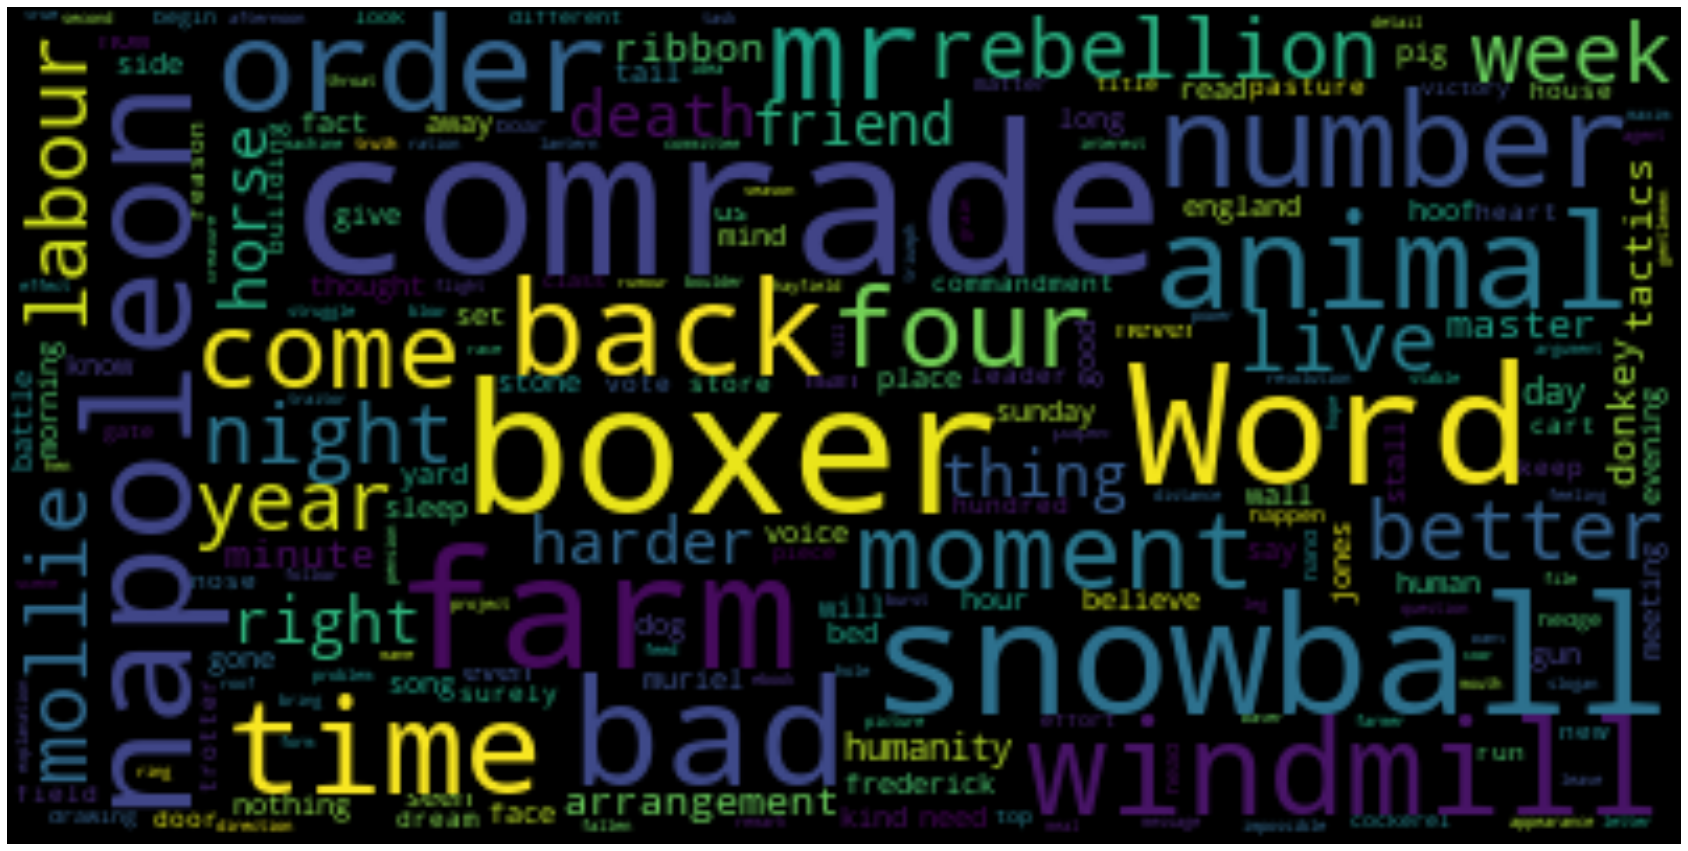

In [58]:
from wordcloud import WordCloud
#WordFrequency = open('data/Word Frequency Summary.txt')  
# WordCloud = WordCloud().generate(mytext)
# %pylab inline
# import matplotlib.pyplot as plt
# plt.imshow(WordCloud, interpolation='bilinear')
# plt.axis("off")

wordcloud = WordCloud(background_color="black", max_font_size=50).generate(mytext)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

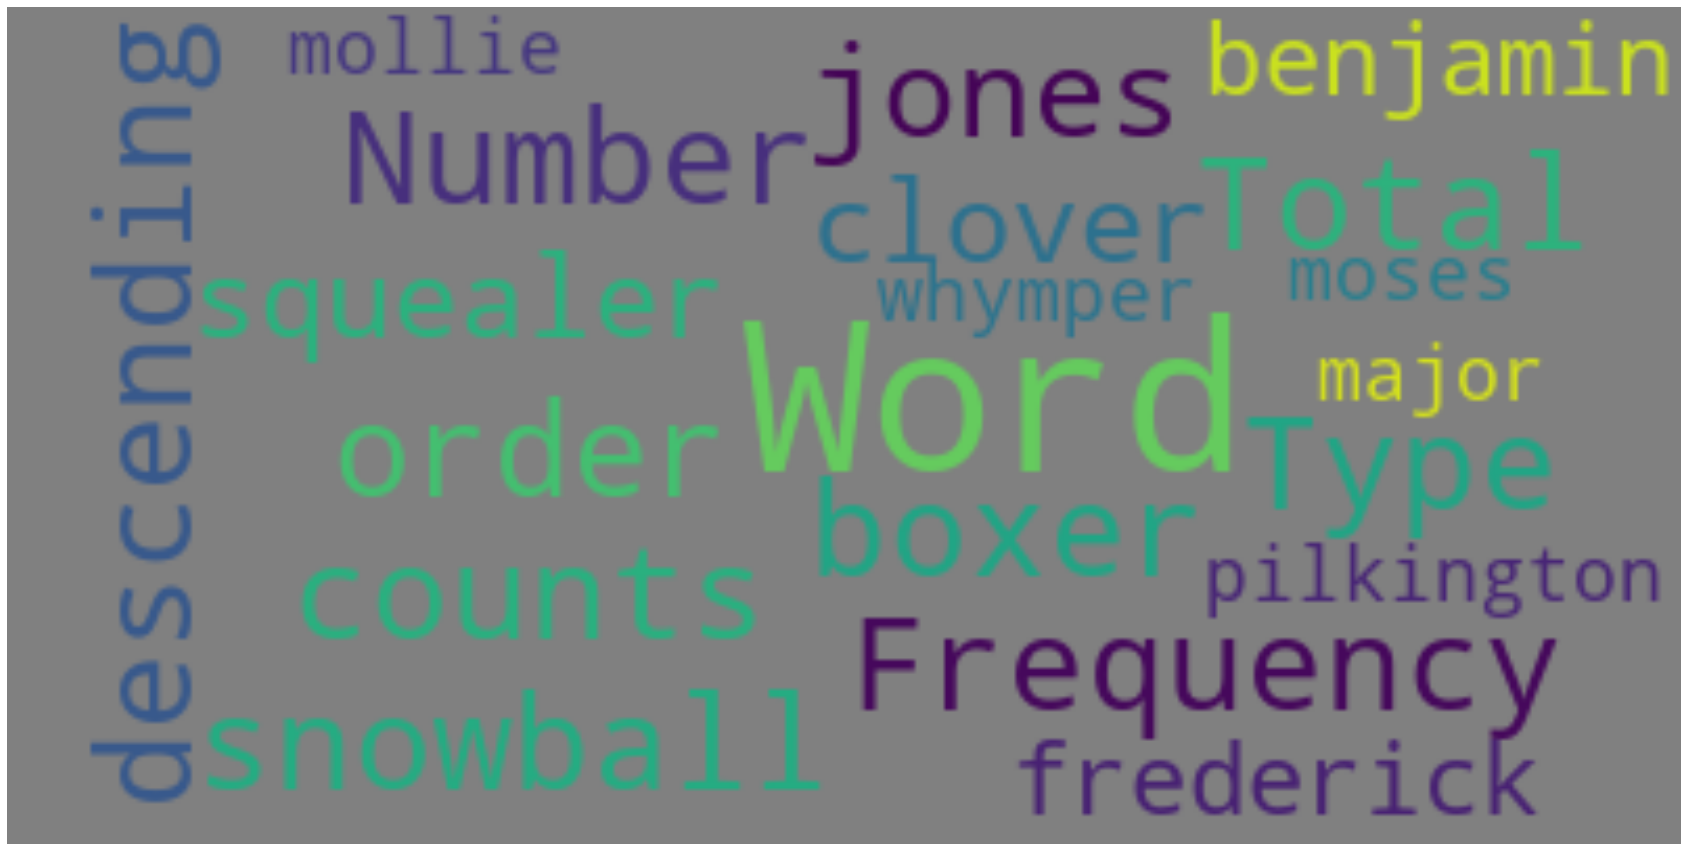

In [120]:
WordFrequencyCharacter = "data/Word Frequency Summary Of Character.txt"
with open(WordFrequencyCharacter) as f:
    mytext1 = f.read()
    
wordcloud = WordCloud(background_color="gray", max_font_size=50).generate(mytext1)
plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")


#  <font color=blue size=6> Ⅴ. Charactors Analysis </font>

In [13]:
、、Ⅳ、Ⅴ、Ⅵ、Ⅶ、Ⅷ、Ⅸ、Ⅸ、Ⅹ、Ⅺ、Ⅻ

SyntaxError: invalid character in identifier (<ipython-input-13-fb9c2c0feed7>, line 1)

In [1]:
pip install jieba

     |████████████████████████████████| 7.3MB 6.3MB/s eta 0:00:01
  Created wheel for jieba: filename=jieba-0.39-cp37-none-any.whl size=7282593 sha256=77abb33b904646cd4fd805622f0bc9423fd80802a7613181cbf18a79fb0a8aff
  Stored in directory: /Users/leslie/Library/Caches/pip/wheels/c9/c7/63/a9ec0322ccc7c365fd51e475942a82395807186e94f0522243
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [11]:

import os, sys
# import codecs
import jieba, codecs, math
import jieba.posseg as pseg
 
names = {}
relationships = {}
lineNames = []


In [26]:
jieba.load_userdict("data/人民的名义人物表.txt")

In [27]:
with codecs.open("data/人民的名义.txt", "r","utf8") as af:
    for line in af.readlines():
        poss = pseg.cut(line)
        lineNames.append([])
        for w in line:
            if w.flag != "nr" or len(w.word) < 2:
                continue
            lineNames[-1].append(w.word)
            if names.get(w.word) is None:
                names[w.word] = 0
                relationships[w.word] = {}
            names[w.word] += 1


# excludes = ['the','and','to','of','i','a','in','it','that','is',
#             'you','my','with','not','his','this','but','for',
#             'me','s','he','be','as','so','him','your','was','had','have','I','we','from','here','there','said','t','on',
#            'word','d','one','up','an','her','she','when','they','what','about','were','out','our','if','by','no','didn','am','"i','at',
#             'just','all','or','and','would','then','them','who','into','than','all','down','over','way','day']
# def getText():    
#     txt=open('data/The Kite Runner.txt','r').read()    
#     txt=txt.lower()    
#     for ch in "~@#$%^&*()_-+=<>?/,.:;{}[]|\'""":    
#         txt=txt.replace(ch,' ')       
#     return txt    

# KiteRunner=getText()    
# words=KiteRunner.split()

AttributeError: 'str' object has no attribute 'flag'

In [78]:
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [79]:
with open("data/Animal Farm.txt") as text:
    book_text = text.read()

In [80]:
#split at pov changes
book_text = book_text.replace('—From', ' * * * ')
sections = book_text.split('* * *')  
book_text=book_text.lower()    
for ch in "~@#$%^&*()_-+=<>?/,.:;{}[]|\'""":    
    book_text=book_text.replace(ch,' ')       


In [81]:
#remove all dialogue
cleaned_sections = []

for section in sections:
    quotes = re.findall("“.*?”", section)
    for quote in quotes:
        section = section.replace(quote, " ")
    cleaned_sections.append(section)

In [82]:
#Create characters list and cooccurnce matrix
characters = ['snowball','napoleon','major','wyndle ', 'boxer', 'squealer', 'mollie', 'clover',
              'benjamin', 'moses', 'mrjones', 'mrsjones', 'mrpilkington', 'mrwhymper', 
              'mrfrederick']
characters = [character.title() for character in characters] #oops title case

In [83]:
#--> iterate through each and store in dictionary
sections_dictionary = {}
iterative = 0
for section in cleaned_sections:
    iterative += 1
    for char in characters:
        if char in section:
            if str(iterative) in sections_dictionary.keys():
                sections_dictionary[str(iterative)].append(char)  
            else:
                sections_dictionary[str(iterative)] = [char]       

In [84]:
##set base df (co-occurance matrix)
df = pd.DataFrame(columns = characters, index = characters)
df[:] = int(0)

#iterate through each POV of book and add one for each character-character relationship
#-> in this case, relationship equates to appearing in the same POV
for value in sections_dictionary.values():
    for character1 in characters:
        for character2 in characters:
            if character1 in value and character2 in value:
                df[character1][character2] += 1
                df[character2][character1] += 1

In [85]:
#add weights to edges
edge_list = [] #test networkx
for index, row in df.iterrows():
    i = 0
    for col in row:
        weight = float(col)/464
        edge_list.append((index, df.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in characters:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
           node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

AttributeError: 'dict' object has no attribute 'iterkeys'

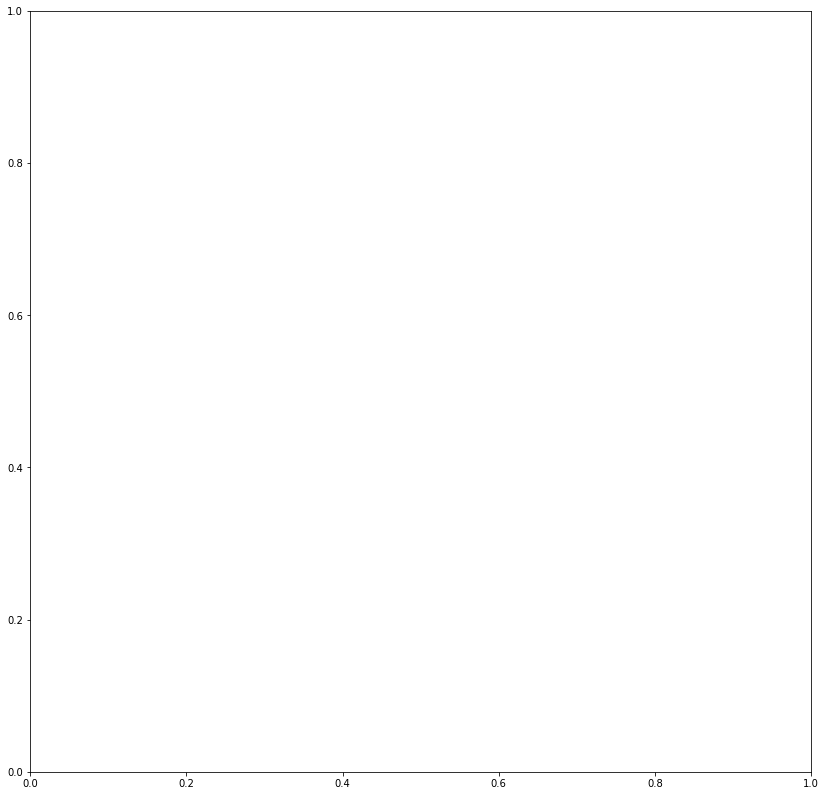

In [86]:
#set canvas size
plt.subplots(figsize=(14,14))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
G.nodes(data=True)
G.edges(data = True)

#manually copy and pasted the node order using 'nx.nodes(G)'
#Couldn't determine another route to listing out the order of nodes for future work
node_order = ['snowball','napoleon','major','wyndle ', 'boxer', 'squealer', 'mollie', 'clover',
              'benjamin', 'moses', 'mrjones', 'mrsjones', 'mrpilkington', 'mrwhymper', 
              'mrfrederick']

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)
            
#reorder edge list - this was a pain
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test.iterkeys():
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


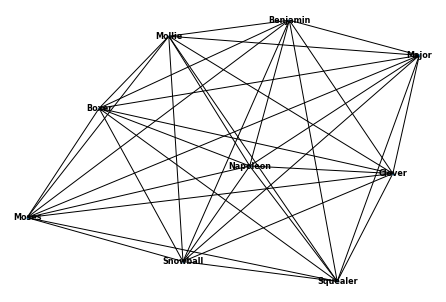

In [87]:
#drawing custimization
node_scalar = 800
edge_scalar = 10
sizes = [x[1]*node_scalar for x in updated_node_order]
widths = [x*edge_scalar for x in updated_again_edges]

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw(G, pos, with_labels=True, font_size = 8, font_weight = 'bold', 
        node_size = sizes, width = widths)

#plt.axis('off')
#plt.savefig("imgs/sl_network2.png") # save as png